# Report structure
0. Import libraries
1. Import data

# 0. Import libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib

%matplotlib inline

# 1. Import data

In [4]:
taxi_feb_2019 = pd.read_parquet("data/yellow_tripdata_2019-02.parquet")
taxi_data = pd.concat([taxi_feb_2019])

In [5]:
print(taxi_data.shape)
taxi_data.head()

(7049370, 19)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2019-02-01 00:59:04,2019-02-01 01:07:27,1.0,2.1,1.0,N,48,234,1,9.0,0.5,0.5,2.0,0.0,0.3,12.3,0.0,None
1,1,2019-02-01 00:33:09,2019-02-01 01:03:58,1.0,9.8,1.0,N,230,93,2,32.0,0.5,0.5,0.0,0.0,0.3,33.3,0.0,None
2,1,2019-02-01 00:09:03,2019-02-01 00:09:16,1.0,0.0,1.0,N,145,145,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.0,None
3,1,2019-02-01 00:45:38,2019-02-01 00:51:10,1.0,0.8,1.0,N,95,95,2,5.5,0.5,0.5,0.0,0.0,0.3,6.8,0.0,None
4,1,2019-02-01 00:25:30,2019-02-01 00:28:14,1.0,0.8,1.0,N,140,263,2,5.0,0.5,0.5,0.0,0.0,0.3,6.3,0.0,None


# 2. Data exploration

In [6]:
taxi_data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')

In [30]:
taxi_data = taxi_data[['tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'payment_type',
       'total_amount']]

In [31]:
taxi_data.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-02-01 00:59:04,2019-02-01 01:07:27,1.0,2.1,1.0,48,234,1,12.3
1,2019-02-01 00:33:09,2019-02-01 01:03:58,1.0,9.8,1.0,230,93,2,33.3
2,2019-02-01 00:09:03,2019-02-01 00:09:16,1.0,0.0,1.0,145,145,2,3.8
3,2019-02-01 00:45:38,2019-02-01 00:51:10,1.0,0.8,1.0,95,95,2,6.8
4,2019-02-01 00:25:30,2019-02-01 00:28:14,1.0,0.8,1.0,140,263,2,6.3


array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>],
       [<Axes: title={'center': 'DOLocationID'}>,
        <Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

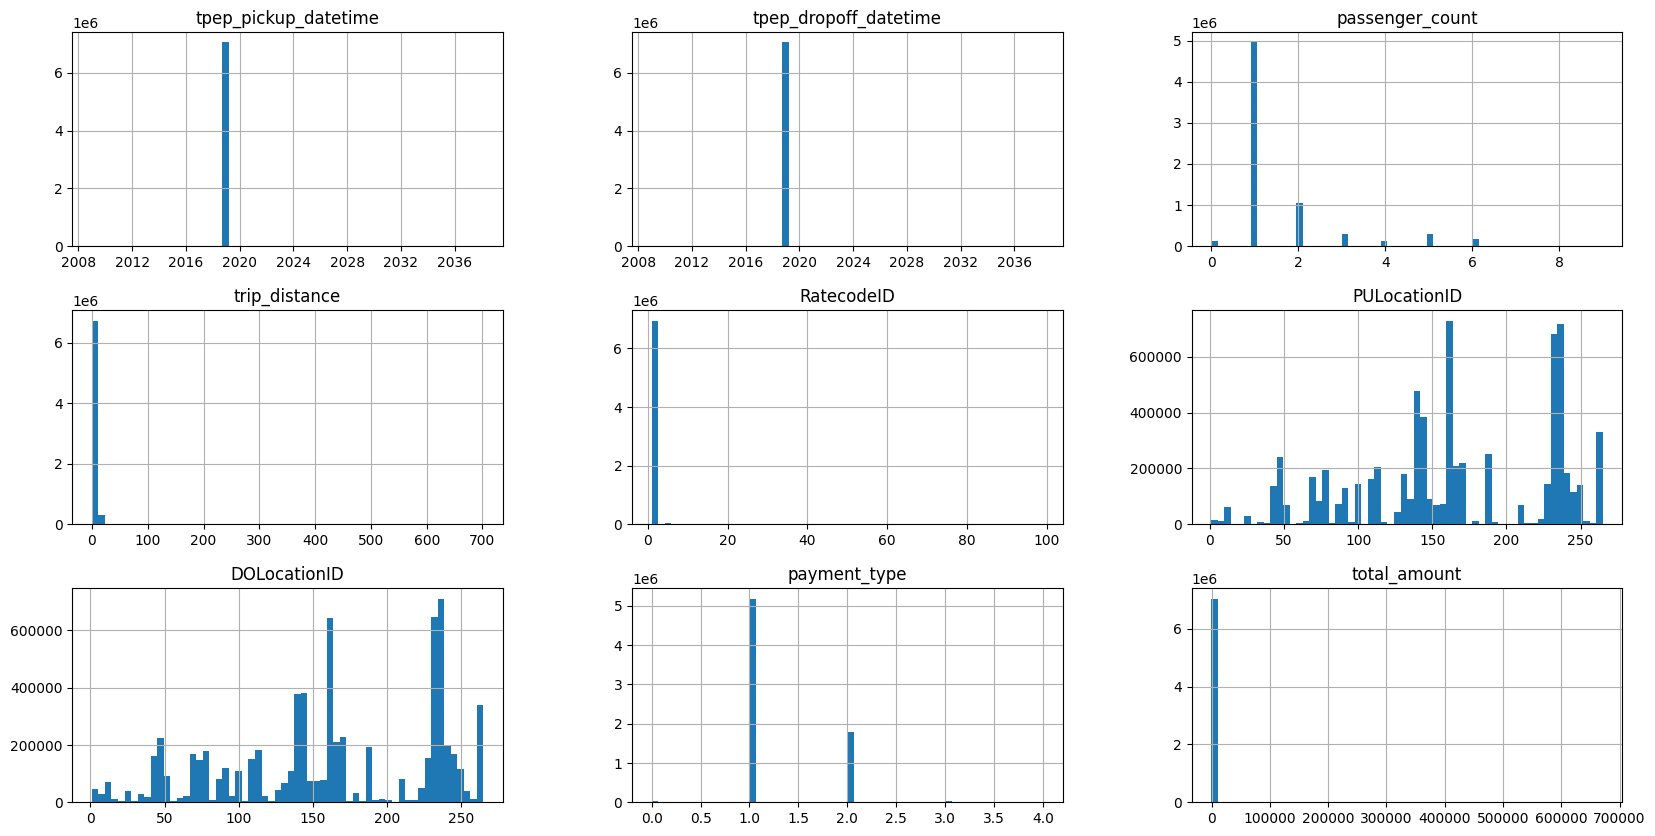

In [32]:
taxi_data.hist(figsize=(20,10), bins=60)

In [33]:
taxi_data["RatecodeID"].value_counts()

RatecodeID
1.0     6792297
2.0      155984
5.0       53857
3.0       12583
4.0        4762
99.0        184
6.0          40
Name: count, dtype: int64

<Axes: xlabel='index', ylabel='total_amount'>

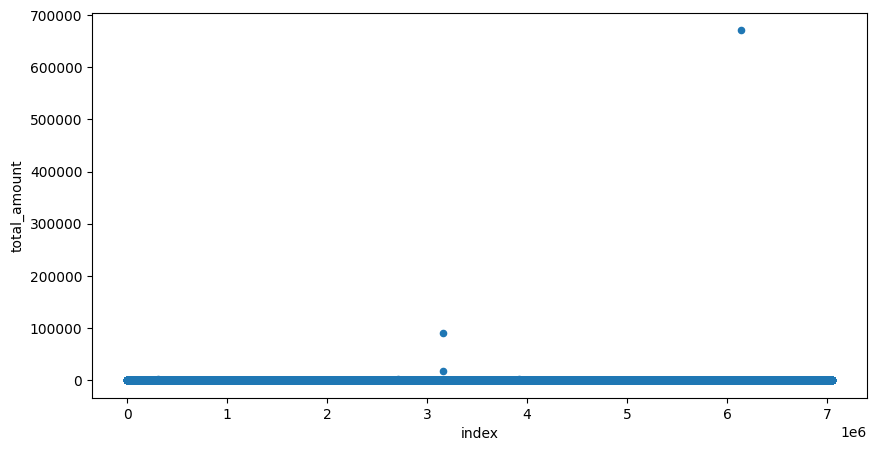

In [10]:
taxi_data.reset_index().plot(kind="scatter", y = "total_amount", x = "index", figsize=(10,5))

<Axes: xlabel='index', ylabel='total_amount'>

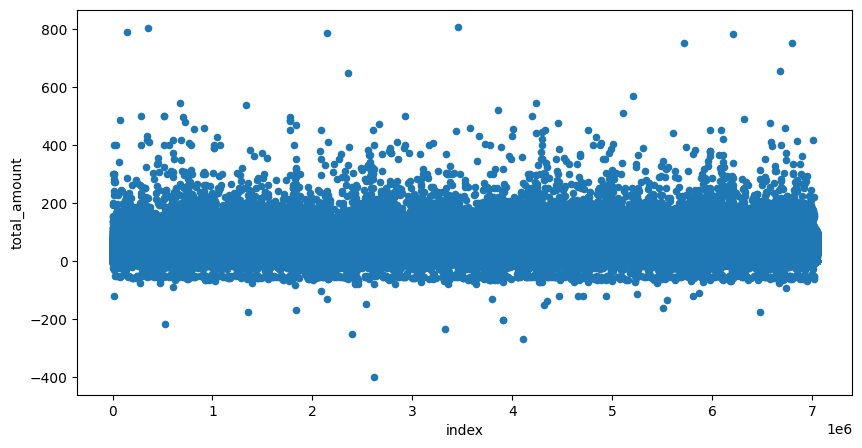

In [12]:
taxi_data[taxi_data["total_amount"]<1000].reset_index().plot(kind="scatter", y = "total_amount", x = "index", figsize=(10,5))

There are two thing I have to deal with - very high values and negative values in total amount. First, let's look at negative values.

Let's take a closer look at the range of negative values. 

(9475, 19)


<Axes: xlabel='index', ylabel='total_amount'>

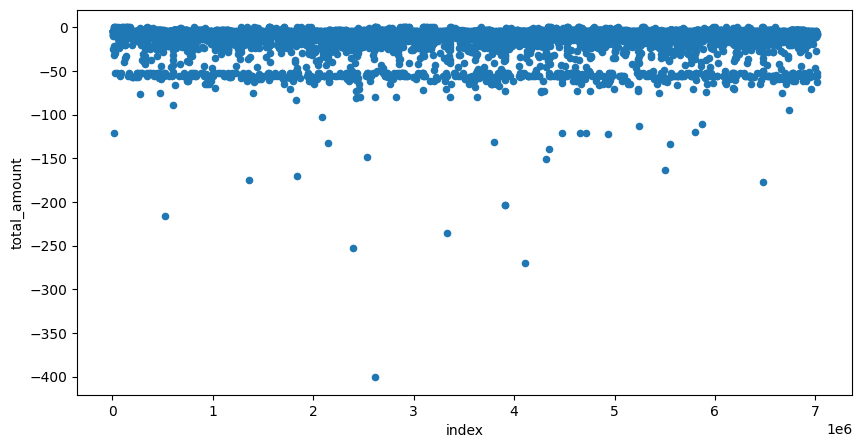

In [13]:
print(taxi_data[taxi_data["total_amount"]<0].shape)
taxi_data[taxi_data["total_amount"]<0].reset_index().plot(kind="scatter", y="total_amount", x="index", figsize=(10,5))

In [34]:
taxi_data[taxi_data["total_amount"]<0].head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
1801,2019-02-01 00:16:34,2019-02-01 00:16:49,3.0,0.00,1.0,226,226,4,-3.8
2111,2019-02-01 00:37:22,2019-02-01 00:37:25,4.0,0.00,1.0,264,132,3,-3.8
3416,2019-02-01 00:43:08,2019-02-01 01:13:15,2.0,5.71,1.0,161,82,2,-24.8
4807,2019-02-01 00:14:00,2019-02-01 00:15:35,1.0,0.20,1.0,114,114,4,-4.3
5419,2019-02-01 00:47:13,2019-02-01 00:50:58,1.0,0.72,1.0,137,170,3,-5.8


In [35]:
taxi_data[taxi_data["total_amount"]<0]["payment_type"].value_counts()

payment_type
3    5393
4    3602
2     478
1       2
Name: count, dtype: int64

<Axes: >

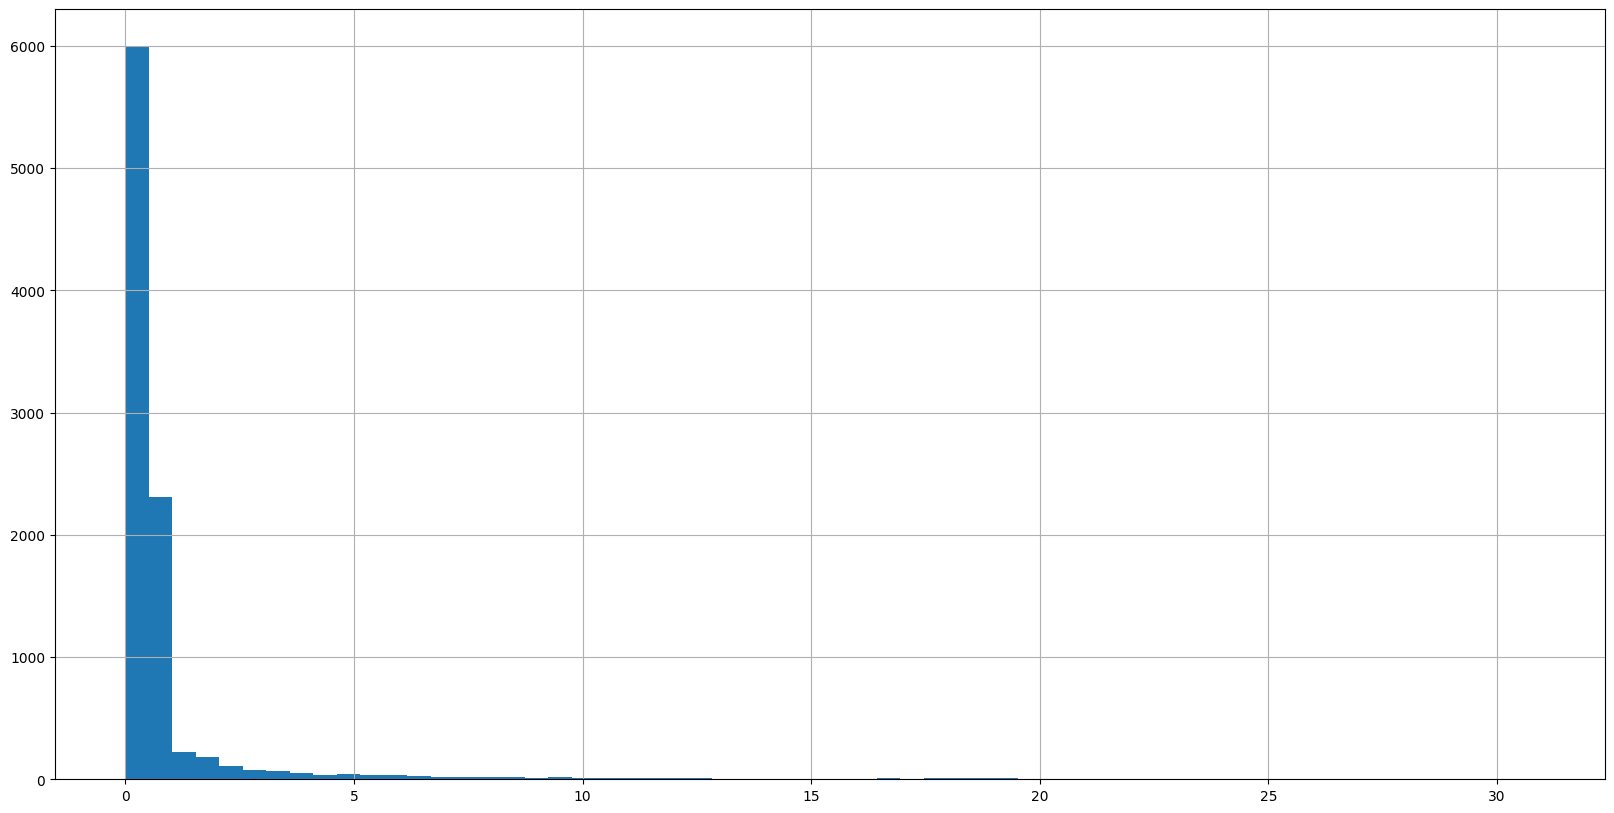

In [16]:
taxi_data[taxi_data["total_amount"]<0]["trip_distance"].hist(figsize=(20,10), bins=60)

As I looked more into the negative values I decided to delete them. As I can see from the Payment type, there are mostly two types - 3 - No charge and 4 - Dispute. Then nearly 6000 trips had almost no distance. So we can asume that those values were most likely errors or maybe the person had changed its mind.

Also there is no need to keep track of zero total amount. Those trips are not useful for us, so let's see how many of them I have. Maybe I will delete them too.

In [36]:
print(taxi_data[taxi_data["total_amount"]==0].shape)
taxi_data[taxi_data["total_amount"]==0].head()

(1777, 9)


,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
310,2019-01-31 23:59:28,2019-02-01 00:12:09,6.0,2.81,1.0,163,43,2,0.0
7125,2019-02-01 00:20:44,2019-02-01 00:21:30,1.0,0.00,1.0,193,193,1,0.0
7126,2019-02-01 00:09:57,2019-02-01 00:09:57,1.0,0.00,1.0,264,193,2,0.0
11196,2019-02-01 01:47:08,2019-02-01 01:47:53,1.0,0.00,1.0,193,193,1,0.0
11197,2019-02-01 01:03:18,2019-02-01 01:03:20,1.0,0.00,1.0,264,193,1,0.0


trip_distance
0.00     1241
0.10       21
0.01       20
0.02       14
0.03       11
         ... 
1.64        1
0.47        1
16.79       1
15.23       1
17.63       1
Name: count, Length: 348, dtype: int64

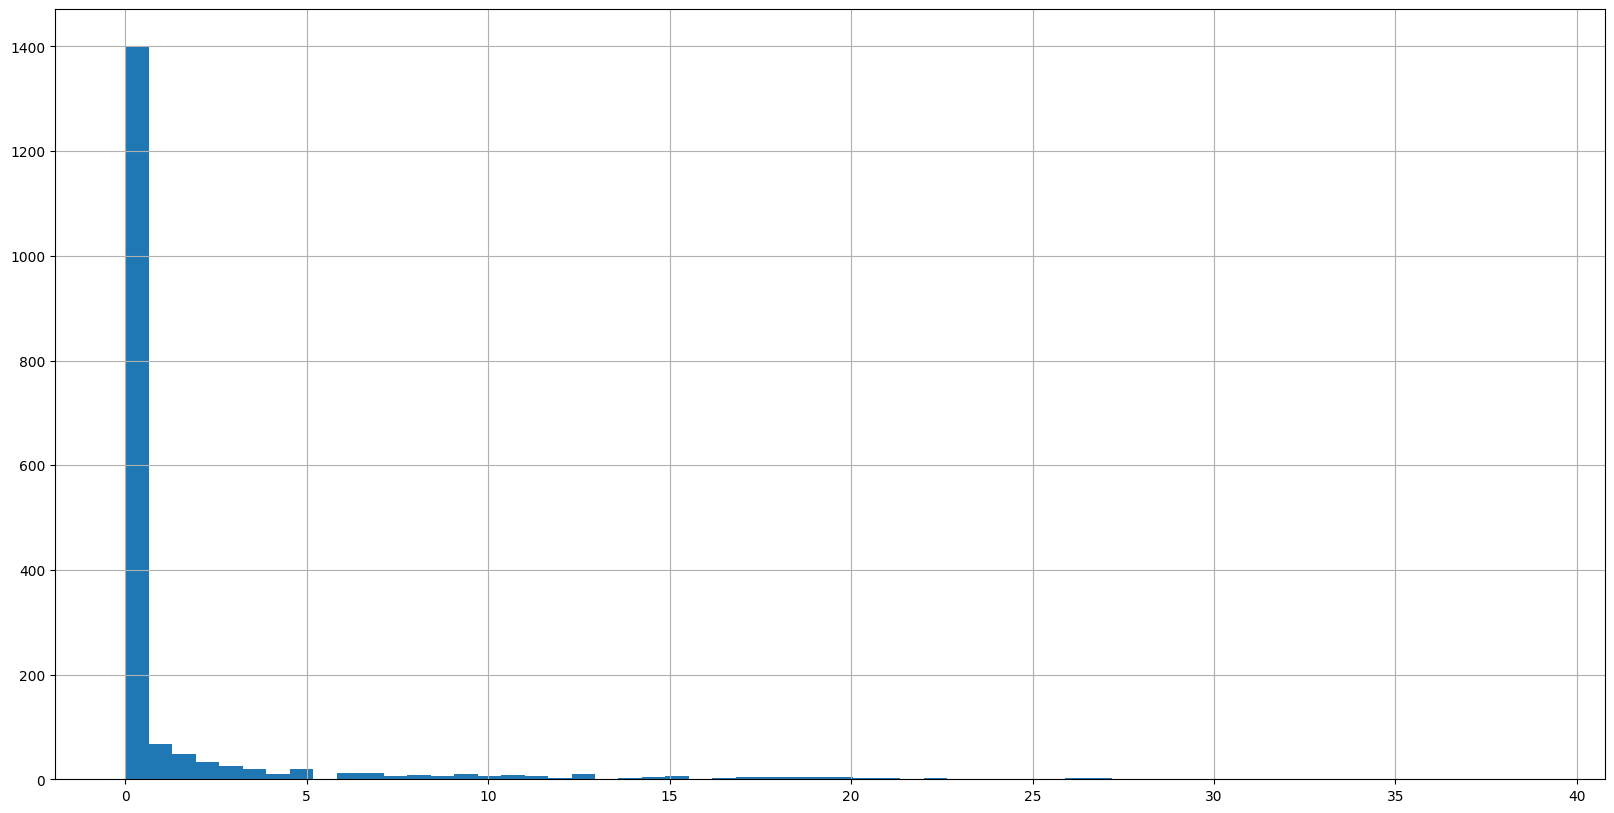

In [18]:
taxi_data[taxi_data["total_amount"]==0]["trip_distance"].hist(figsize=(20,10), bins=60)
taxi_data[taxi_data["total_amount"]==0]["trip_distance"].value_counts()

So, there are only 1.777 values with total amount of zero and most of them have zero distance. I feel free to delete these. 

And now let's look at the very high values.

<Axes: xlabel='index', ylabel='total_amount'>

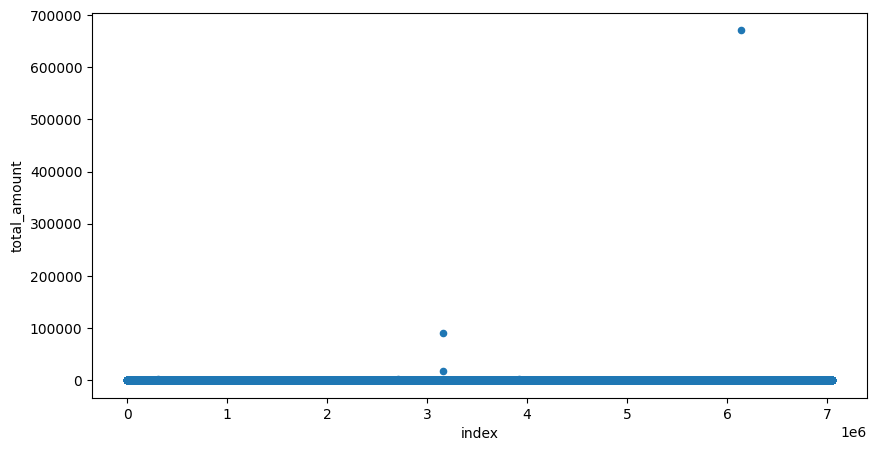

In [19]:
taxi_data.reset_index().plot(kind="scatter", y = "total_amount", x = "index", figsize=(10,5))

In [37]:
taxi_data[taxi_data["total_amount"]>200].shape

(1035, 9)

There are only 1.035 records of total amount higher than 200 dollars. So we can agree to cut from 200 dollars level. 

In [38]:
taxi_data["total_amount"].mean()

np.float64(18.689249017997387)

The mean of total amount is 18.69 dollars.

# 3. Data cleaning

In [39]:
taxi_data_filtered=taxi_data[(taxi_data["total_amount"]>0)&(taxi_data["total_amount"]<200)]

In [40]:
print(taxi_data.shape)
print(taxi_data_filtered.shape)

(7049370, 9)
(7037079, 9)


So after deleting values I decided on to, I have lost 12.291 records.

And now let's see if there are any null values.

In [41]:
taxi_data_filtered.isna().sum()

tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          29421
trip_distance                0
RatecodeID               29421
PULocationID                 0
DOLocationID                 0
payment_type                 0
total_amount                 0
dtype: int64

In [42]:
taxi_data_filtered[(taxi_data_filtered["passenger_count"].isna()) & (taxi_data_filtered["RatecodeID"].isna())].shape[0]

29421

There are 29.421 records with unknown passenger numbers and unknown RatecodeID. For now, I will leave these record in. 

Later on, I decided to remove those data, as they will only make troubles.

In [43]:
taxi_data_filtered = taxi_data[(taxi_data["total_amount"]>0)&(taxi_data["total_amount"]<200)&(taxi_data["passenger_count"].notna())&(taxi_data["RatecodeID"].notna())]

In [44]:
print(taxi_data.shape)
print(taxi_data_filtered.shape)

(7049370, 9)
(7007658, 9)


# 4. Data preparation

In [45]:
taxi_data_prepared = taxi_data_filtered.copy()

It needs to be .copy(), because it makes a deep copy (if I would use only taxi_data_prepared = taxi_data_filtered, and change anything in taxi_data_prepared, it will also affect taxi_data_filtered. But if I make a hard copy with .copy(), it won't change a data in taxi_data_filtered).

In [46]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
total_amount                    float64
dtype: object

If I would need to change datetime into datetime format: 

taxi_data_prepared.loc[:,"tpep_pickup_datetime"] = pd.to_datetime(taxi_data_prepared.loc[:,"tpep_pickup_datetime"])

In [47]:
taxi_data_prepared["RatecodeID"] = taxi_data_prepared["RatecodeID"].astype("object")
taxi_data_prepared["PULocationID"] = taxi_data_prepared["PULocationID"].astype("object")
taxi_data_prepared["DOLocationID"] = taxi_data_prepared["DOLocationID"].astype("object")
taxi_data_prepared["payment_type"] = taxi_data_prepared["payment_type"].astype("object")
taxi_data_prepared["passenger_count"] = taxi_data_prepared["passenger_count"].astype("int")

In [48]:
taxi_data_prepared.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                   int64
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

I changed RatecodeID, PULocationID, DOLocationID and payment_type to object, because even though it's numerical records, it does not have relation. The numbers are just codes, not real numbers identifying amount of something.

In [49]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2019-02-01 00:59:04,2019-02-01 01:07:27,1,2.1,1.0,48,234,1,12.3
1,2019-02-01 00:33:09,2019-02-01 01:03:58,1,9.8,1.0,230,93,2,33.3
2,2019-02-01 00:09:03,2019-02-01 00:09:16,1,0.0,1.0,145,145,2,3.8
3,2019-02-01 00:45:38,2019-02-01 00:51:10,1,0.8,1.0,95,95,2,6.8
4,2019-02-01 00:25:30,2019-02-01 00:28:14,1,0.8,1.0,140,263,2,6.3


In [50]:
taxi_data_prepared["transaction_date"]=pd.to_datetime(taxi_data_prepared["tpep_pickup_datetime"].dt.date)
taxi_data_prepared["transaction_year"]= taxi_data_prepared["tpep_pickup_datetime"].dt.year
taxi_data_prepared["transaction_month"]= taxi_data_prepared["tpep_pickup_datetime"].dt.month
taxi_data_prepared["transaction_day"]= taxi_data_prepared["tpep_pickup_datetime"].dt.day
taxi_data_prepared["transaction_hour"]= taxi_data_prepared["tpep_pickup_datetime"].dt.hour

In [51]:
taxi_data_prepared.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,transaction_date,transaction_year,transaction_month,transaction_day,transaction_hour
0,2019-02-01 00:59:04,2019-02-01 01:07:27,1,2.1,1.0,48,234,1,12.3,2019-02-01,2019,2,1,0
1,2019-02-01 00:33:09,2019-02-01 01:03:58,1,9.8,1.0,230,93,2,33.3,2019-02-01,2019,2,1,0
2,2019-02-01 00:09:03,2019-02-01 00:09:16,1,0.0,1.0,145,145,2,3.8,2019-02-01,2019,2,1,0
3,2019-02-01 00:45:38,2019-02-01 00:51:10,1,0.8,1.0,95,95,2,6.8,2019-02-01,2019,2,1,0
4,2019-02-01 00:25:30,2019-02-01 00:28:14,1,0.8,1.0,140,263,2,6.3,2019-02-01,2019,2,1,0


In [52]:
taxi_data_prepared["transaction_year"].value_counts()

transaction_year
2019    7007571
2009         61
2008         22
2038          4
Name: count, dtype: int64

In [53]:
taxi_data_prepared["transaction_month"].value_counts()

transaction_month
2     7007039
1         365
3         124
5          36
4          30
6          26
12         22
7          10
8           5
9           1
Name: count, dtype: int64

In [54]:
taxi_data_prepared["transaction_day"].value_counts()

transaction_day
1     297724
8     287812
28    279732
6     276598
9     275974
7     274526
14    270401
27    270035
13    267058
2     266095
22    262846
26    262036
15    255619
23    252374
5     251929
21    251919
20    240380
16    239486
12    236760
11    235063
19    234133
25    233714
4     232200
10    220682
3     220261
17    211491
24    207883
18    192579
31       338
30         7
29         3
Name: count, dtype: int64

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'passenger_count'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>,
        <Axes: title={'center': 'transaction_date'}>],
       [<Axes: title={'center': 'transaction_year'}>,
        <Axes: title={'center': 'transaction_month'}>,
        <Axes: title={'center': 'transaction_day'}>],
       [<Axes: title={'center': 'transaction_hour'}>, <Axes: >, <Axes: >]],
      dtype=object)

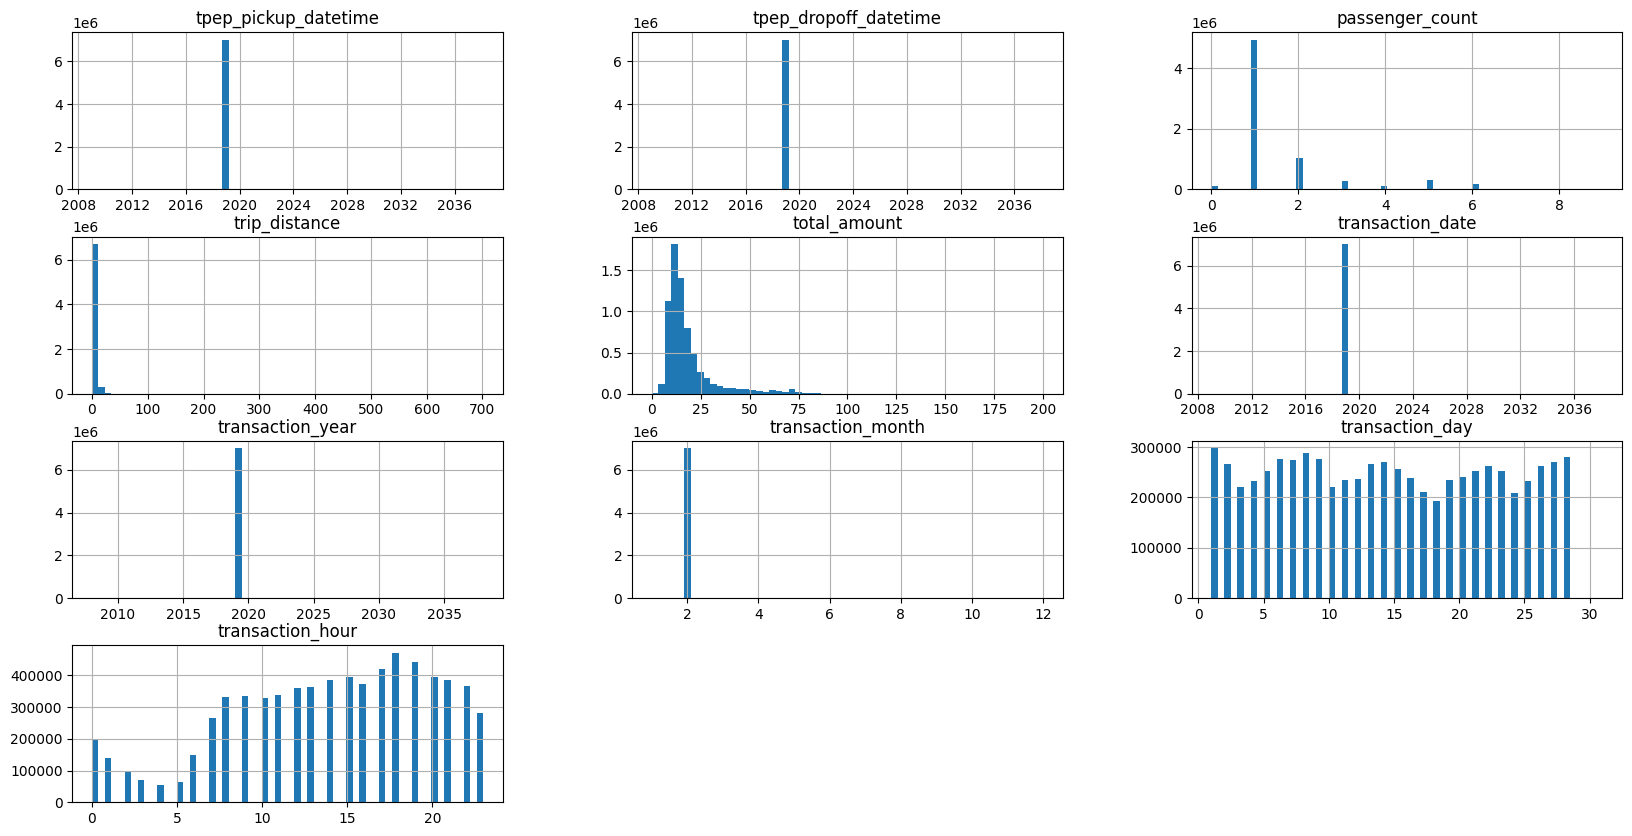

In [55]:
taxi_data_prepared.hist(figsize=(20,10), bins=60)

As I can see, there are some wrong records when it comes to the date. Now, I will delete records that are not from February of 2019.

In [56]:
taxi_data_prepared = taxi_data_prepared[
    (taxi_data_prepared["transaction_year"] == 2019) &
    (taxi_data_prepared["transaction_month"] == 2) &
    (~taxi_data_prepared["transaction_day"].isin([29, 30, 31]))
]


In [57]:
taxi_data_prepared.shape

(7007035, 14)

Noting down categorical and numerical columns.

In [58]:
categorical_columns = ["PULocationID", "transaction_date", "transaction_month", "transaction_day","transaction_hour"]
numerical_columns = ["trip_distance", "total_amount"]
all_needed_columns = categorical_columns + numerical_columns

In [59]:
main_taxi_df = taxi_data_prepared[all_needed_columns]
print(main_taxi_df.shape)
main_taxi_df.head()

(7007035, 7)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount
0,48,2019-02-01,2,1,0,2.1,12.3
1,230,2019-02-01,2,1,0,9.8,33.3
2,145,2019-02-01,2,1,0,0.0,3.8
3,95,2019-02-01,2,1,0,0.8,6.8
4,140,2019-02-01,2,1,0,0.8,6.3


Aggregating data points

Now is a good time to think about what we want to predict. Depending on this, we need to transform our data to have a certain format.


In [60]:
taxi_grouped_by_region = main_taxi_df.groupby(categorical_columns).mean().reset_index()
taxi_grouped_by_region["count_of_transactions"] = main_taxi_df.groupby(categorical_columns).count().reset_index()["total_amount"]
print(taxi_grouped_by_region.shape)
taxi_grouped_by_region.head()

(94648, 8)


,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-02-01,2,1,6,0.070000,109.765000,4
1,1,2019-02-01,2,1,7,0.000000,102.300000,1
2,1,2019-02-01,2,1,10,14.500000,107.800000,1
3,1,2019-02-01,2,1,13,0.030000,85.517500,4
4,1,2019-02-01,2,1,14,5.203333,97.061667,6


<Axes: >

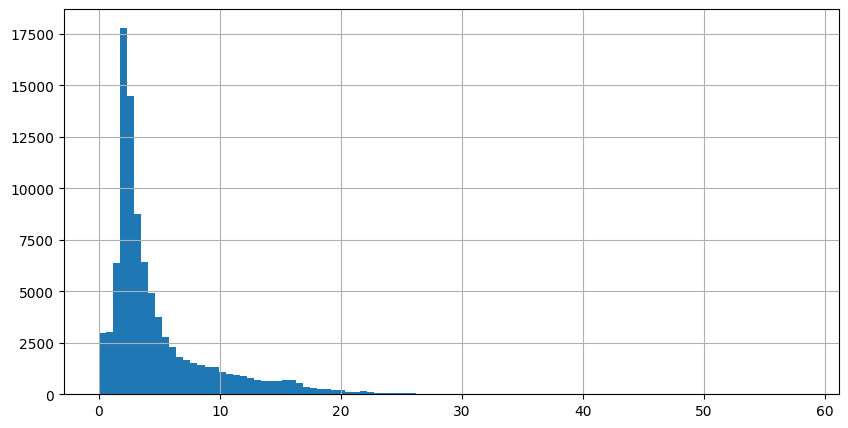

In [61]:
taxi_grouped_by_region["trip_distance"].hist(bins=(100), figsize = (10,5))

<Axes: >

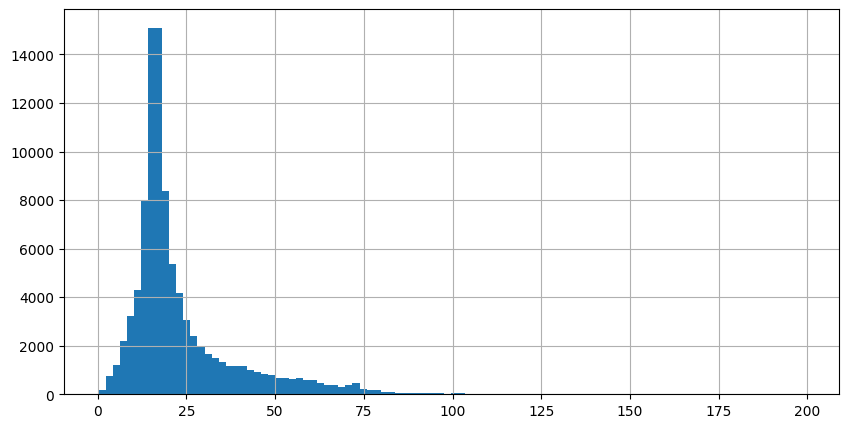

In [62]:
taxi_grouped_by_region["total_amount"].hist(bins=(100), figsize = (10,5))

# 5. Benchmark model

First, let's make a benchmark model - basic model to giveus some information. Later on, I will try to improve this model and we will see, if it wasn't just waste of time. 

In [63]:
data_for_benchmark_model = taxi_grouped_by_region.copy()

In [71]:
categorical_features_benchmark = ["PULocationID", "transaction_month", "transaction_day", "transaction_hour"]
input_features_benchmark = categorical_features_benchmark
target_feature_benchmark = "total_amount" # what I'm trying to predict

# 5.1 Train-test split

Technique used for splitting dataset into two parts. One is used for training/teaching our model (usually 60-80%), and the other is used for testing (20-40%). The goal is to test if our model is useable for real-world data and not only for our given data. 

I will use method called one-hot encode. What this does is it takes categorical values and makes a new features. 

Example: We have a table with cars and their color.

Car - Color

Car1 - Red

Car2 - Blue

Car3 - Green

Car4  Red

...

What it does is this:

Car - Red - Blue - Green

Car1 - 1 - 0 - 0

Car2 - 0 - 1 - 0

Car3 - 0 - 0 - 1

Car4 - 1 - 0 - 0

...

Why it's not Red = 1, Blue = 2...? In this case the model could think that Blue (2) is somehow more than Red (1). 

In [72]:
from sklearn.model_selection import train_test_split

x_bench = data_for_benchmark_model[input_features_benchmark]
y_bench = data_for_benchmark_model[target_feature_benchmark]

# one-hot encode
x_bench = pd.get_dummies(x_bench)
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(x_bench, y_bench, test_size = 0.33, random_state = 42) 

# random_state is a parameter for random seed for generator of random numbers. Because the random_state is the same, I will have the same data distribution for training and testing datasets. 42 is answear to everything. 



# 5.2 Fit a model to data

In [73]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=10) #if I don't put any number here, it will run basic model. The goal is to find the best hyperparameter for my own model.
tree.fit(x_train_b, y_train_b)

DecisionTreeRegressor(max_depth=10)

# 5.3 Model evaluation

In [74]:
model_at_hand = tree

y_pred_b = model_at_hand.predict(x_test_b)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

print("mean_absolute_error", mean_absolute_error(y_test_b, y_pred_b))
print("mean_squared_error", mean_squared_error(y_test_b, y_pred_b))
print("root_mean_squared_error", sqrt(mean_squared_error(y_test_b, y_pred_b)))
print("r2", r2_score(y_test_b, y_pred_b))

mean_absolute_error 8.617098240385525
mean_squared_error 191.64954631038796
root_mean_squared_error 13.843754776446596
r2 0.2873982925748172


mean_absolute_error - difference between what we predicted and what the actual value was

mean_squared_error - takes the diference of mean erorr and squared it - the bigger the worst

root_mean_squared_error - root of mean_squared_error

r2 - score that shows us how good our model fits pattern of data (0-1)

<Axes: xlabel='true', ylabel='pred'>

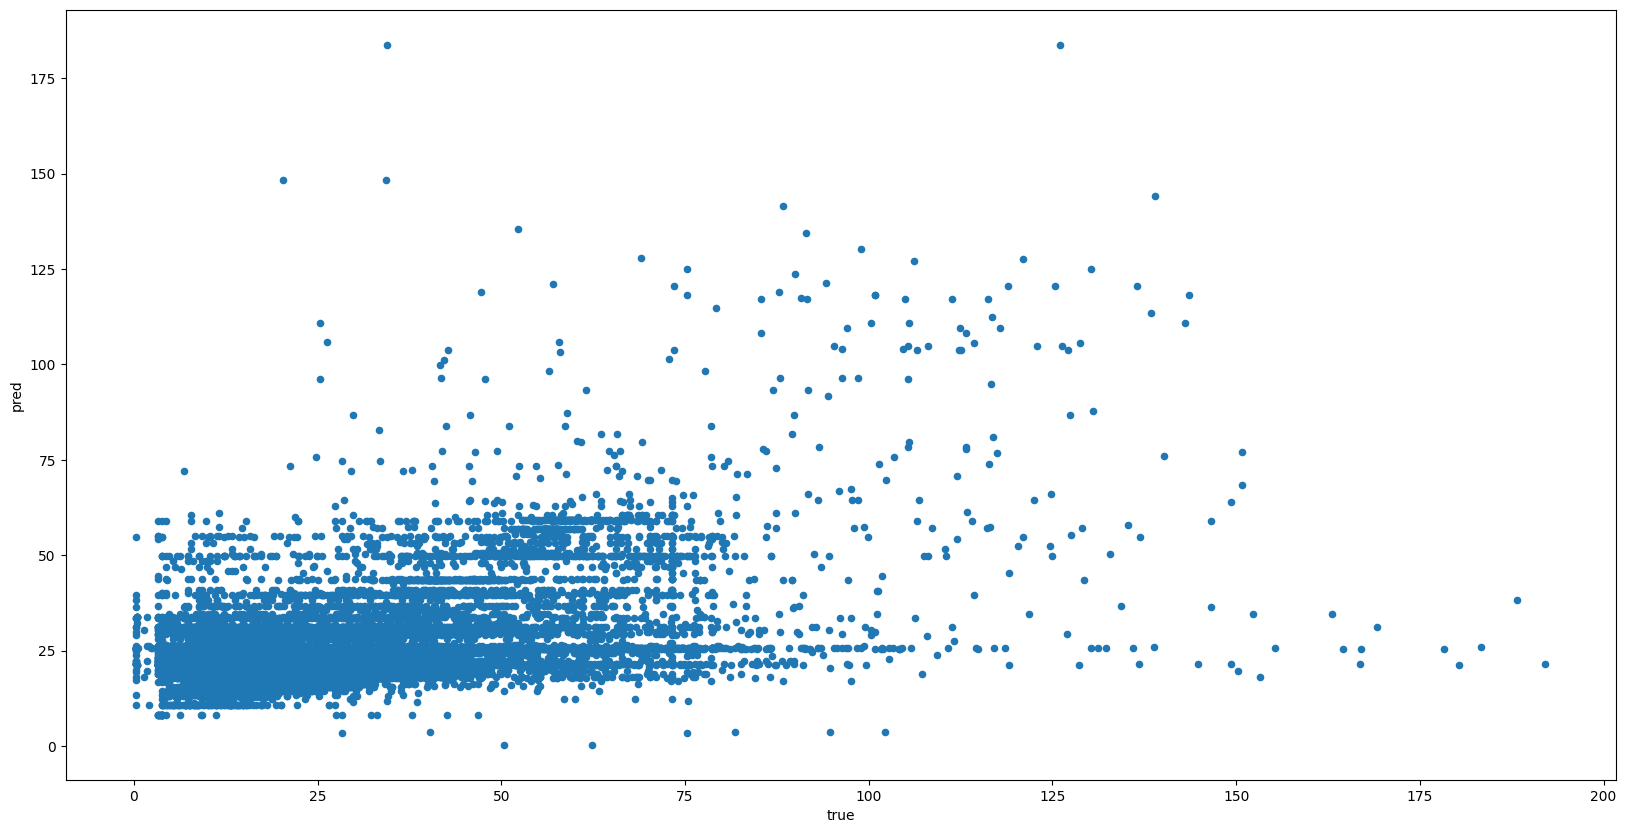

In [75]:
data = {"true": y_test_b, "pred": y_pred_b}
results = pd.DataFrame(data)

results.plot(figsize = (20,10), kind = "scatter", x = "true", y = "pred")

The ideal outcome would be a streight line - so now I have to improve the model.

# 6. Feature engineering

In [78]:
taxi_grouped_by_region.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions
0,1,2019-02-01,2,1,6,0.070000,109.765000,4
1,1,2019-02-01,2,1,7,0.000000,102.300000,1
2,1,2019-02-01,2,1,10,14.500000,107.800000,1
3,1,2019-02-01,2,1,13,0.030000,85.517500,4
4,1,2019-02-01,2,1,14,5.203333,97.061667,6


In [79]:
data_with_new_features = taxi_grouped_by_region.copy()

### Date-related features

In [85]:
# Let's mark down the weekdays 

data_with_new_features["transaction_week_day"] = data_with_new_features["transaction_date"].dt.weekday
data_with_new_features["weekend"] = data_with_new_features["transaction_week_day"].apply(lambda x: True if x == 5 or x == 6 else False) 

# Monday = 0
# Tuesday = 1
# Wednesday = 2
# Thursday = 3
# Friday = 4
# Saturday = 5
# Sunday = 6

In [88]:
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday
0,1,2019-02-01,2,1,6,0.070000,109.765000,4,4,False,False
1,1,2019-02-01,2,1,7,0.000000,102.300000,1,4,False,False
2,1,2019-02-01,2,1,10,14.500000,107.800000,1,4,False,False
3,1,2019-02-01,2,1,13,0.030000,85.517500,4,4,False,False
4,1,2019-02-01,2,1,14,5.203333,97.061667,6,4,False,False


In [87]:
# let's mark down the US national holidays

from pandas.tseries.holiday import USFederalHolidayCalendar

cal = USFederalHolidayCalendar()
holidays = cal.holidays(start = "2018", end = "2020")
data_with_new_features["is_holiday"] = data_with_new_features["transaction_date"].isin(holidays)

### Borough information

In [90]:
zone_lookup = pd.read_csv("data/taxi_zone_lookup.csv")
zone_lookup = zone_lookup[["LocationID", "Borough"]]
zone_lookup["LocationID"] = zone_lookup["LocationID"].astype(str)
zone_lookup.head()

,LocationID,Borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


In [93]:
data_with_new_features.dtypes

PULocationID                      int64
transaction_date         datetime64[ns]
transaction_month                 int32
transaction_day                   int32
transaction_hour                  int32
trip_distance                   float64
total_amount                    float64
count_of_transactions             int64
transaction_week_day              int32
weekend                            bool
is_holiday                         bool
dtype: object

In [94]:
zone_lookup.dtypes

LocationID    object
Borough       object
dtype: object

In [95]:
zone_lookup["LocationID"] = zone_lookup["LocationID"].astype("int")

In [96]:
zone_lookup.dtypes

LocationID     int64
Borough       object
dtype: object

In [97]:
data_with_new_features = data_with_new_features.merge(zone_lookup, left_on = "PULocationID", right_on = "LocationID", how = "outer")
data_with_new_features.head()

,PULocationID,transaction_date,transaction_month,transaction_day,transaction_hour,trip_distance,total_amount,count_of_transactions,transaction_week_day,weekend,is_holiday,LocationID,Borough
0,1.0,2019-02-01,2.0,1.0,6.0,0.070000,109.765000,4.0,4.0,False,False,1,EWR
1,1.0,2019-02-01,2.0,1.0,7.0,0.000000,102.300000,1.0,4.0,False,False,1,EWR
2,1.0,2019-02-01,2.0,1.0,10.0,14.500000,107.800000,1.0,4.0,False,False,1,EWR
3,1.0,2019-02-01,2.0,1.0,13.0,0.030000,85.517500,4.0,4.0,False,False,1,EWR
4,1.0,2019-02-01,2.0,1.0,14.0,5.203333,97.061667,6.0,4.0,False,False,1,EWR


In [98]:
data_with_new_features["Borough"].value_counts()

Borough
Manhattan        41021
Brooklyn         22236
Queens           20454
Bronx             9046
Unknown            672
Staten Island      305
EWR                272
Name: count, dtype: int64

### Weather related features

In [185]:
nyc_weather = pd.read_csv("data/NYC_Weather_2016_2022.csv")
nyc_weather.head()

,time,temperature_2m (°C),precipitation (mm),rain (mm),cloudcover (%),cloudcover_low (%),cloudcover_mid (%),cloudcover_high (%),windspeed_10m (km/h),winddirection_10m (°)
0,2016-01-01T00:00,7.6,0.0,0.0,69.0,53.0,0.0,72.0,10.0,296.0
1,2016-01-01T01:00,7.5,0.0,0.0,20.0,4.0,0.0,56.0,9.8,287.0
2,2016-01-01T02:00,7.1,0.0,0.0,32.0,3.0,0.0,99.0,9.7,285.0
3,2016-01-01T03:00,6.6,0.0,0.0,35.0,5.0,0.0,100.0,9.2,281.0
4,2016-01-01T04:00,6.3,0.0,0.0,34.0,4.0,0.0,100.0,9.1,279.0


In [186]:
nyc_weather_updated = nyc_weather[["time", "temperature_2m (°C)", "rain (mm)", "cloudcover (%)", "windspeed_10m (km/h)"]]
nyc_weather_updated.head()

,time,temperature_2m (°C),rain (mm),cloudcover (%),windspeed_10m (km/h)
0,2016-01-01T00:00,7.6,0.0,69.0,10.0
1,2016-01-01T01:00,7.5,0.0,20.0,9.8
2,2016-01-01T02:00,7.1,0.0,32.0,9.7
3,2016-01-01T03:00,6.6,0.0,35.0,9.2
4,2016-01-01T04:00,6.3,0.0,34.0,9.1


In [187]:
nyc_weather_updated.dtypes

time                     object
temperature_2m (°C)     float64
rain (mm)               float64
cloudcover (%)          float64
windspeed_10m (km/h)    float64
dtype: object

In [188]:
nyc_weather_updated = nyc_weather_updated[nyc_weather_updated['time'].notna()]
nyc_weather_updated = nyc_weather_updated[nyc_weather_updated['time'].str.contains('T')]

In [234]:
nyc_weather_updated.head()

,Date,Time,temperature_2m (°C),rain (mm),cloudcover (%),windspeed_10m (km/h)
0,2016-01-01,00:00,7.6,0.0,69.0,10.0
1,2016-01-01,01:00,7.5,0.0,20.0,9.8
2,2016-01-01,02:00,7.1,0.0,32.0,9.7
3,2016-01-01,03:00,6.6,0.0,35.0,9.2
4,2016-01-01,04:00,6.3,0.0,34.0,9.1


In [235]:
print(nyc_weather_updated.shape)

(59760, 6)


In [233]:
nyc_weather_updated['time'] = pd.to_datetime(nyc_weather_updated['time'], errors='coerce')

nyc_weather_updated['Date'] = nyc_weather_updated['time'].dt.date
nyc_weather_updated['Time'] = nyc_weather_updated['time'].dt.strftime('%H:%M')


KeyError: 'time'

In [236]:
nyc_weather_updated.head()

,Date,Time,temperature_2m (°C),rain (mm),cloudcover (%),windspeed_10m (km/h)
0,2016-01-01,00:00,7.6,0.0,69.0,10.0
1,2016-01-01,01:00,7.5,0.0,20.0,9.8
2,2016-01-01,02:00,7.1,0.0,32.0,9.7
3,2016-01-01,03:00,6.6,0.0,35.0,9.2
4,2016-01-01,04:00,6.3,0.0,34.0,9.1


In [193]:
nyc_weather_updated = nyc_weather_updated[["Date", "Time", "temperature_2m (°C)", "rain (mm)", "cloudcover (%)", "windspeed_10m (km/h)"]]
nyc_weather_updated.head()

,Date,Time,temperature_2m (°C),rain (mm),cloudcover (%),windspeed_10m (km/h)
0,2016-01-01,00:00,7.6,0.0,69.0,10.0
1,2016-01-01,01:00,7.5,0.0,20.0,9.8
2,2016-01-01,02:00,7.1,0.0,32.0,9.7
3,2016-01-01,03:00,6.6,0.0,35.0,9.2
4,2016-01-01,04:00,6.3,0.0,34.0,9.1


In [238]:
nyc_weather_2019 = nyc_weather_updated.copy()

In [239]:
nyc_weather_2019.dtypes

Date                     object
Time                     object
temperature_2m (°C)     float64
rain (mm)               float64
cloudcover (%)          float64
windspeed_10m (km/h)    float64
dtype: object

In [240]:
nyc_weather_2019["Date"] = nyc_weather_2019["Date"].astype("datetime64[ns]")


In [241]:
from datetime import datetime

nyc_weather_2019['Time'] = nyc_weather_2019['Time'].apply(lambda x: datetime.strptime(x, "%H:%M").time())

In [217]:
#nyc_weather_2019["Time"] = nyc_weather_2019["Time"].astype("datetime64[ns]")

TypeError: <class 'datetime.time'> is not convertible to datetime, at position 0

In [242]:
nyc_weather_2019.dtypes

Date                    datetime64[ns]
Time                            object
temperature_2m (°C)            float64
rain (mm)                      float64
cloudcover (%)                 float64
windspeed_10m (km/h)           float64
dtype: object

In [243]:
nyc_weather_2019.head()

,Date,Time,temperature_2m (°C),rain (mm),cloudcover (%),windspeed_10m (km/h)
0,2016-01-01,00:00:00,7.6,0.0,69.0,10.0
1,2016-01-01,01:00:00,7.5,0.0,20.0,9.8
2,2016-01-01,02:00:00,7.1,0.0,32.0,9.7
3,2016-01-01,03:00:00,6.6,0.0,35.0,9.2
4,2016-01-01,04:00:00,6.3,0.0,34.0,9.1


In [244]:
nyc_weather_2019 = nyc_weather_2019[nyc_weather_2019['Date'].dt.year == 2019]

In [245]:
nyc_weather_2019.head()

,Date,Time,temperature_2m (°C),rain (mm),cloudcover (%),windspeed_10m (km/h)
26304,2019-01-01,00:00:00,6.4,1.8,100.0,14.4
26305,2019-01-01,01:00:00,6.6,1.7,100.0,16.2
26306,2019-01-01,02:00:00,6.8,2.4,100.0,17.3
26307,2019-01-01,03:00:00,7.6,4.1,100.0,18.7
26308,2019-01-01,04:00:00,7.9,5.6,100.0,14.0


array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'temperature_2m (°C)'}>],
       [<Axes: title={'center': 'rain (mm)'}>,
        <Axes: title={'center': 'cloudcover (%)'}>],
       [<Axes: title={'center': 'windspeed_10m (km/h)'}>, <Axes: >]],
      dtype=object)

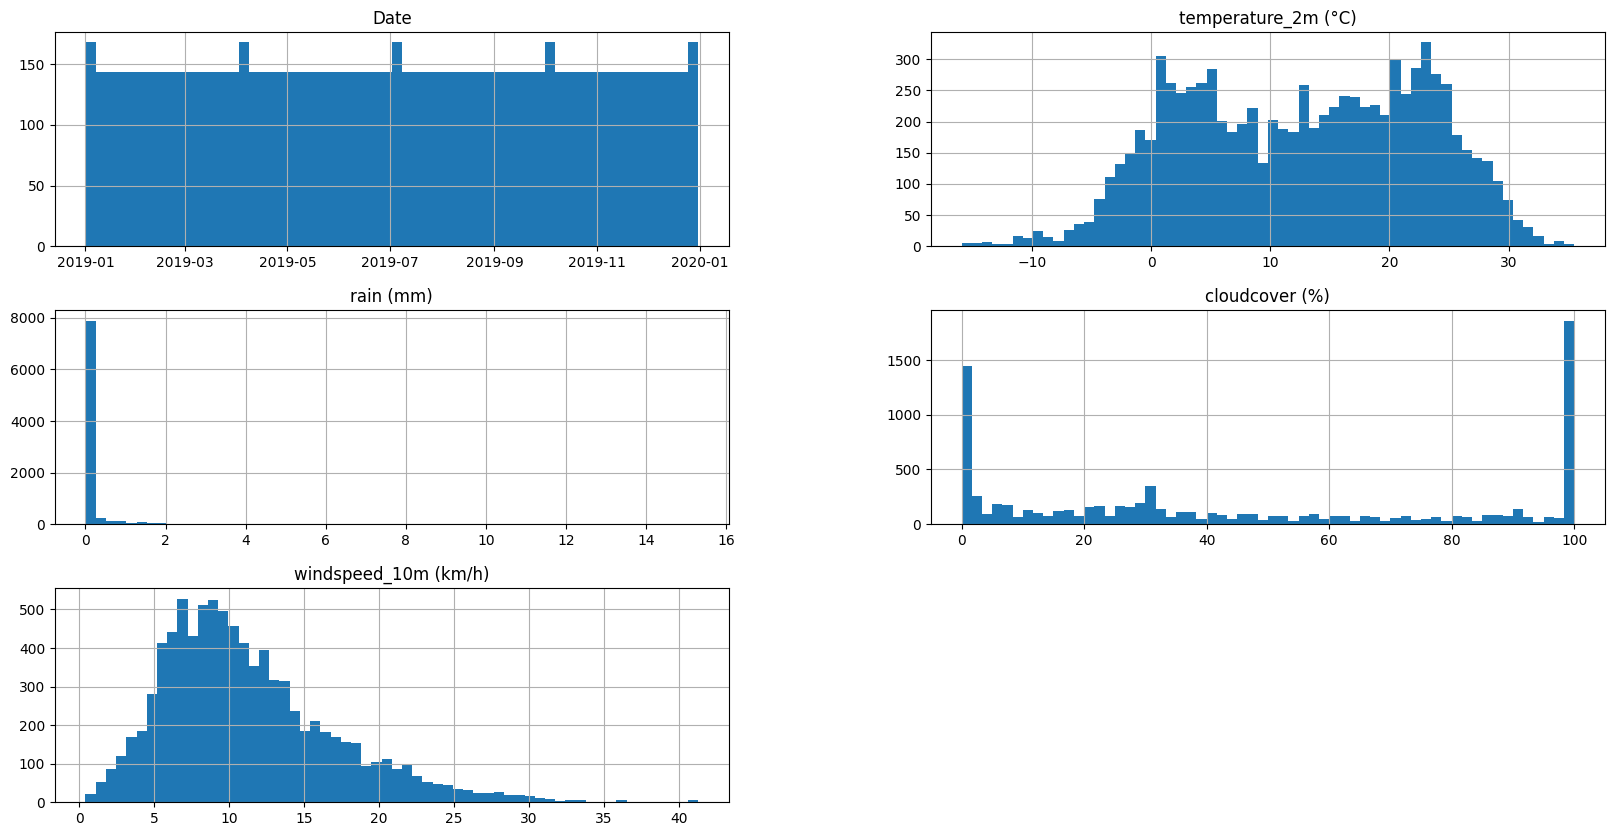

In [246]:
nyc_weather_2019.hist(figsize=(20,10), bins=60)